In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [2]:
def sub_Dict():
    sub_Dict = dict({99: ['797','806','809','826','843','845','855','856','857'], 
                 114: ['1031','1153','1154','1157','1174','1262','1264','1266',
        '1364','1367','1379','1380','1381','1384','1435','1465','1467','1468','1489','1492','1493','1494','1495','1498','1519',
        '1520','1527','1532','1536','1541','1721','1722','1737','1741','1788','1791','1810','1812','1833','1934'],
        177:['2310','2316','2318','2323','2338','2339','2340','2348','2353','2356','2357','2358','2377',
            '2378','2381','2383','2385','2386','2387','2388','2389','2390','2391','2394','2395','2396','2399',
            '2401','2402','2404','2405','2407','2434','2444','2456',
             '2433','2447','2477','2479','2489','2547','2548','2549','2553','2555','2558','2559','2578','2951','2958',
            '2961','2962','2963','2964','2967','2968','2975','2977','2978','2981','2983',
             '2998','2999','3051','3052','3053']}) 
    return sub_Dict

def GetCohort(subID):
    subDict = sub_Dict()
    for key, value in subDict.items():
        if subID in value:
            return key
        
def subID_list():
    subID = ['797','806','809','826','843','845','855','856','857','1031','1153','1154','1157','1174','1262','1264','1266',
        '1364','1367','1379','1380','1381','1384','1435','1465','1467','1468','1489','1492','1493','1494','1495','1498','1519',
        '1520','1527','1532','1536','1541','1721','1722','1737','1741','1788','1791','1810','1812','1833','1934',
            '2310','2316','2318','2323','2338','2339','2340','2348','2353','2356','2357','2358','2377','2378',
             '2381','2383','2385','2386','2387','2388','2389','2390','2391','2394','2395','2396','2399',
             '2401','2402','2404','2405','2407','2434','2444','2456',
            '2433','2447','2477','2479','2489','2547','2548','2549','2553','2555','2558','2559','2578','2951','2958',
            '2961','2962','2963','2964','2967','2968','2975','2977','2978','2981','2983',
             '2998','2999','3051','3052','3053']
    return subID

In [93]:
pc3_177 = pd.read_csv("/Users/zyy219/Documents/Risk_project/Data/Weekly_measurement/pc_177_round.csv")
sleep_177 = pd.read_csv("/Users/zyy219/Documents/Risk_project/Data/Weekly_measurement/sleep_weekly_177.csv")
social_177 = pd.read_csv('/Users/zyy219/Documents/Risk_project/Data/Weekly_measurement/social_weekly_177.csv')

pc3_114 = pd.read_csv("/Users/zyy219/Documents/Risk_project/Data/Weekly_measurement/pc_114_round.csv")
sleep_114 = pd.read_csv("/Users/zyy219/Documents/Risk_project/Data/Weekly_measurement/sleep_weekly_114.csv")
social_114 = pd.read_csv('/Users/zyy219/Documents/Risk_project/Data/Weekly_measurement/social_weekly_114.csv')

pc3_99 = pd.read_csv("/Users/zyy219/Documents/Risk_project/Data/Weekly_measurement/pc_99_round.csv")
sleep_99 = pd.read_csv("/Users/zyy219/Documents/Risk_project/Data/Weekly_measurement/sleep_weekly_99.csv")
social_99 = pd.read_csv('/Users/zyy219/Documents/Risk_project/Data/Weekly_measurement/social_weekly_99.csv')

In [95]:
pc3_all = pd.concat([pc3_99,pc3_114,pc3_177])
sleep_all = pd.concat([sleep_99,sleep_114, sleep_177])
social_all = pd.concat([social_99,social_114,social_177])



In [96]:
pc3_all
pc3_reversed = pc3_all.iloc[:, ::-1]
sleep_reversed = sleep_all.iloc[:, ::-1]
social_reversed = social_all.iloc[:, ::-1]
label = ['sleep_t-1','sleep_t-2','sleep_t-3','sleep_t-4','sleep_t-5','sleep_t-6','sleep_t-7']
vac = ['pc_t-1','pc_t-2','pc_t-3','pc_t-4','pc_t-5','pc_t-6','pc_t-7']
nan_list = [np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan]

In [59]:
df_list = []
for n in range(115):
    df = pd.DataFrame({'subID':sleep_all.iloc[n][0],'const':np.ones(7),'sleep_t-1' : nan_list,'sleep_t-2' : nan_list,'sleep_t-3' : nan_list,'sleep_t-4' : nan_list,'sleep_t-5' : nan_list,
                 'sleep_t-6' : nan_list,'sleep_t-7' : nan_list,'pc_t-1' : nan_list,'pc_t-2' : nan_list,'pc_t-3' : nan_list,
                  'pc_t-4' : nan_list,'pc_t-5' : nan_list,'pc_t-6' : nan_list,'pc_t-7' : nan_list,'Y':nan_list},index=['t-1', 't-2', 't-3' , 't-4' , 't-5' ,'t-6','t-7' ])

    for i in range(7):
        df[label[i]].iloc[0:7-i] = sleep_reversed.iloc[n][1+i:8].tolist()
        df[vac[i]].iloc[0:7-i] = pc3_reversed.iloc[n][1+i:8].tolist()

        df['Y'].iloc[0:7] = pc3_reversed.iloc[n][0:7].tolist()
    df_list.append(df)
regression_df = pd.concat(df_list)

In [60]:
regression_df = regression_df[~regression_df.subID.isin([1174,1154,1467,1468,2378])]
t_1regression = regression_df[['subID','Y','sleep_t-4','pc_t-4','sleep_t-3','pc_t-3','sleep_t-2','pc_t-2','sleep_t-1','pc_t-1']]

t_1regression = pd.get_dummies(t_1regression, columns=['subID'])

In [61]:

Y = t_1regression['Y']
X = t_1regression[t_1regression.columns[7:]]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.params
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     6.695
Date:                Thu, 10 Jun 2021   Prob (F-statistic):           8.13e-57
Time:                        18:13:13   Log-Likelihood:                -3668.9
No. Observations:                 770   AIC:                             7562.
Df Residuals:                     658   BIC:                             8082.
Df Model:                         111                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           31.6940      6.126      5.173      0.000      19.665      43.723
sleep_t-1       -0.4058      0.694     -0.585      0.559      -1.768       0.956
pc_t-1          -0.1098      0.037     -2.973      0.003      -0.182      -0.037
subID_797.0     30.8029     11.587      2.658      0.008       8.051      53.555
subID_806.0      9.6615     11.561      0.836      0.404     -13.040      32.363
subID_809.0     10.6787     11.558      0.924      0.356     -12.015      33.373
subID_826.0     32.7207     11.576      2.827      0.005       9.990      55.452
subID_843.0    -11.8413     11.695     -1.013      0.312     -34.804      11.122
subID_845.0     -5.9613     11.596     -0.514      0.607     -28.731      16.808
subID_855.0    -52.2112     11.692     -4.465      0.000     -75.170     -29.253
subID_856.0    -59.7587     12.579     -4.751      0.000     -84.459     -35.058
subID_857.0    -31.7461     11.581     -2.741      0.006     -54.485      -9.007
subID_1031.0   -46.1464     12.971     -3.558      0.000     -71.616     -20.677
subID_1153.0   -18.1232     11.574     -1.566      0.118     -40.850       4.604
subID_1157.0    10.4725     11.571      0.905      0.366     -12.248      33.193
subID_1262.0    44.2110     11.626      3.803      0.000      21.382      67.040
subID_1264.0   -34.9263     11.814     -2.956      0.003     -58.124     -11.729
subID_1266.0    25.3490     11.590      2.187      0.029       2.592      48.106
subID_1364.0   -33.0391     11.571     -2.855      0.004     -55.759     -10.319
subID_1367.0    -2.1849     11.585     -0.189      0.850     -24.933      20.563
subID_1379.0   -33.3207     12.142     -2.744      0.006     -57.161      -9.480
subID_1380.0   -32.8530     11.701     -2.808      0.005     -55.828      -9.878
subID_1381.0   -28.2327     11.591     -2.436      0.015     -50.992      -5.474
subID_1384.0    10.8448     11.656      0.930      0.352     -12.042      33.731
subID_1435.0   -51.4004     11.785     -4.361      0.000     -74.542     -28.259
subID_1465.0   -21.2817     11.730     -1.814      0.070     -44.315       1.751
subID_1489.0    50.5914     11.711      4.320      0.000      27.595      73.588
subID_1492.0   -39.8331     11.632     -3.424      0.001     -62.673     -16.993
subID_1493.0     0.1823     11.557      0.016      0.987     -22.510      22.875
subID_1494.0     2.0891     11.568      0.181      0.857     -20.626      24.804
subID_1495.0   -30.1436     11.609     -2.597      0.010     -52.939      -7.348
subID_1498.0    36.0153     11.617      3.100      0.002      13.204      58.827
subID_1519.0   -41.8830     11.642     -3.598      0.000     -64.742     -19.024
subID_1520.0   -33.2009     11.711     -2.835      0.005     -56.197     -10.205
subID_1527.0    70.4201     11.771      5.982      0.000      47.306      93.534
subID

In [62]:
beta1 = np.array(results.params)
X_matx = np.array(X)
y_hat = beta1.T@X_matx.T
residue = Y-y_hat
t_1regression.insert (0, "residue", residue)

In [63]:
t_2regression = t_1regression[['residue','sleep_t-2','pc_t-2']]
t_2regression_df = t_2regression.dropna()

In [64]:
Y1 = t_2regression_df['residue']
X1 = t_2regression_df[['sleep_t-2','pc_t-2']]

model = sm.OLS(Y1,X1)
results = model.fit()
results.params
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                residue   R-squared (uncentered):                   0.007
Model:                            OLS   Adj. R-squared (uncentered):              0.004
Method:                 Least Squares   F-statistic:                              2.474
Date:                Thu, 10 Jun 2021   Prob (F-statistic):                      0.0850
Time:                        18:13:47   Log-Likelihood:                         -3130.9
No. Observations:                 660   AIC:                                      6266.
Df Residuals:                     658   BIC:                                      6275.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
sleep_t-2      0.1951      0.140      1.397      0.163      -0.079       0.469
pc_t-2        -0.0579      0.026     -2.204      0.028      -0.109      -0.006
==============================================================================
Omnibus:                       81.372   Durbin-Watson:                   2.148
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.607
Skew:                           0.845   Prob(JB):                     3.92e-27
Kurtosis:                       4.251   Cond. No.                         6.28
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
beta2 = np.array(results.params)
X_matx1 = np.array(X1)
y_hat1 = beta2.T@X_matx1.T
residue2 = Y1-y_hat1

regression3_df = t_1regression.drop('t-7')
regression3_df.insert (0, "residue2", residue2)
t_3regression = regression3_df[['residue2','sleep_t-3','pc_t-3']]
t_3regression_df = t_3regression.dropna()

Y2 = t_3regression_df['residue2']
X2 = t_3regression_df[['sleep_t-3','pc_t-3']]

model = sm.OLS(Y2,X2)
results = model.fit()
results.params
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               residue2   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.003
Method:                 Least Squares   F-statistic:                            0.04217
Date:                Thu, 10 Jun 2021   Prob (F-statistic):                       0.959
Time:                        18:14:35   Log-Likelihood:                         -2608.7
No. Observations:                 550   AIC:                                      5221.
Df Residuals:                     548   BIC:                                      5230.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
sleep_t-3     -0.0402      0.153     -0.264      0.792      -0.340       0.259
pc_t-3         0.0009      0.029      0.032      0.975      -0.056       0.057
==============================================================================
Omnibus:                       71.618   Durbin-Watson:                   2.110
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.744
Skew:                           0.875   Prob(JB):                     6.62e-24
Kurtosis:                       4.263   Cond. No.                         6.25
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
beta3 = np.array(results.params)
X_matx2 = np.array(X2)
y_hat2 = beta3.T@X_matx2.T
residue3 = Y2-y_hat2

regression4_df = t_1regression.drop('t-7')
regression4_df = regression4_df.drop('t-6')
regression4_df.insert (0, "residue3", residue3)

t_4regression = regression4_df[['residue3','sleep_t-4','pc_t-4']]
t_4regression_df = t_4regression.dropna()

Y3 = t_4regression_df['residue3']
X3 = t_4regression_df[['sleep_t-4','pc_t-4']]

model = sm.OLS(Y3,X3)
results = model.fit()
results.params
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               residue3   R-squared (uncentered):                   0.007
Model:                            OLS   Adj. R-squared (uncentered):              0.002
Method:                 Least Squares   F-statistic:                              1.543
Date:                Thu, 10 Jun 2021   Prob (F-statistic):                       0.215
Time:                        18:18:14   Log-Likelihood:                         -2092.0
No. Observations:                 440   AIC:                                      4188.
Df Residuals:                     438   BIC:                                      4196.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
sleep_t-4      0.2567      0.171      1.500      0.134      -0.080       0.593
pc_t-4        -0.0502      0.032     -1.547      0.122      -0.114       0.014
==============================================================================
Omnibus:                       52.966   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.264
Skew:                           0.866   Prob(JB):                     3.35e-16
Kurtosis:                       3.940   Cond. No.                         6.17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
results.conf_int

<bound method RegressionResults.conf_int of <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x1c282bec50>>

In [72]:
def results_summary_to_dataframe(results):
    '''take the result of an statsmodel results table and transforms it into a dataframe'''
    pvals = results.pvalues
    coeff = results.params
    conf_lower = results.conf_int()[0]
    conf_higher = results.conf_int()[1]

    results_df = pd.DataFrame({"pvals":pvals,
                               "coeff":coeff,
                               "conf_lower":conf_lower,
                               "conf_higher":conf_higher
                                })

    #Reordering...
    results_df = results_df[["coeff","pvals","conf_lower","conf_higher"]]
    return results_df

In [73]:
results_summary_to_dataframe(results)

,coeff,pvals,conf_lower,conf_higher
sleep_t-4,0.256693,0.134208,-0.079533,0.592919
pc_t-4,-0.050182,0.122467,-0.113917,0.013552


Text(0.5, 1.0, 'coefficient')

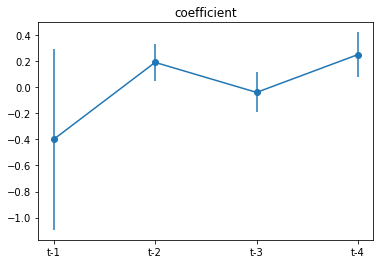

In [92]:
#fig, ax0  = plt.subplots(nrows=1, sharex=True)
x = [1,2,3,4]
y = [-0.4,0.19,-0.04,0.25]
plt.xticks([1, 2, 3,4], ['t-1', 't-2', 't-3','t-4'])
# example error bar values that vary with x-position
error = [0.694,0.14,0.153,0.171]


plt.errorbar(x, y, yerr=error, fmt='-o')
plt.title('coefficient')

In [101]:
label = ['social_t-1','social_t-2','social_t-3','social_t-4','social_t-5','social_t-6','social_t-7']
vac = ['pc_t-1','pc_t-2','pc_t-3','pc_t-4','pc_t-5','pc_t-6','pc_t-7']
df_list = []
for n in range(115):
    df = pd.DataFrame({'subID':sleep_all.iloc[n][0],'const':np.ones(7),'social_t-1' : nan_list,'social_t-2' : nan_list,'social_t-3' : nan_list,'social_t-4' : nan_list,'social_t-5' : nan_list,
                 'social_t-6' : nan_list,'social_t-7' : nan_list,'pc_t-1' : nan_list,'pc_t-2' : nan_list,'pc_t-3' : nan_list,
                  'pc_t-4' : nan_list,'pc_t-5' : nan_list,'pc_t-6' : nan_list,'pc_t-7' : nan_list,'Y':nan_list},index=['t-1', 't-2', 't-3' , 't-4' , 't-5' ,'t-6','t-7' ])

    for i in range(7):
        df[label[i]].iloc[0:7-i] = social_reversed.iloc[n][1+i:8].tolist()
        df[vac[i]].iloc[0:7-i] = pc3_reversed.iloc[n][1+i:8].tolist()

        df['Y'].iloc[0:7] = pc3_reversed.iloc[n][0:7].tolist()
    df_list.append(df)
regression_df = pd.concat(df_list)
regression_df = regression_df[~regression_df.subID.isin([1174,1154,1467,1468,2378])]
t_1regression = regression_df[['subID','Y','social_t-4','pc_t-4','social_t-3','pc_t-3','social_t-2','pc_t-2','social_t-1','pc_t-1']]

t_1regression = pd.get_dummies(t_1regression, columns=['subID'])

In [102]:
t_1regression

,Y,social_t-4,pc_t-4,social_t-3,pc_t-3,social_t-2,pc_t-2,social_t-1,pc_t-1,subID_797.0,...,subID_2975.0,subID_2977.0,subID_2978.0,subID_2981.0,subID_2983.0,subID_2998.0,subID_2999.0,subID_3051.0,subID_3052.0,subID_3053.0
t-1,100.00,9.000,66.92,12.750,57.78,4.000,100.00,9.000,17.19,1,...,0,0,0,0,0,0,0,0,0,0
t-2,17.19,5.500,15.35,9.000,66.92,12.750,57.78,4.000,100.00,1,...,0,0,0,0,0,0,0,0,0,0
t-3,100.00,4.125,24.54,5.500,15.35,9.000,66.92,12.750,57.78,1,...,0,0,0,0,0,0,0,0,0,0
t-4,57.78,6.250,23.13,4.125,24.54,5.500,15.35,9.000,66.92,1,...,0,0,0,0,0,0,0,0,0,0
t-5,66.92,NaN,NaN,6.250,23.13,4.125,24.54,5.500,15.35,1,...,0,0,0,0,0,0,0,0,0,0
t-6,15.35,NaN,NaN,NaN,NaN,6.250,23.13,4.125,24.54,1,...,0,0,0,0,0,0,0,0,0,0
t-7,24.54,NaN,NaN,NaN,NaN,NaN,NaN,6.250,23.13,1,...,0,0,0,0,0,0,0,0,0,0
t-1,28.96,0.000,13.87,8.500,23.56,1.000,25.63,0.000,31.29,0,...,0,0,0,0,0,0,0,0,0,0
t-2,31.29,0.000,13.27,0.000,13.87,8.500,23.56,1.000,25.63,0,...,0,0,0,0,0,0,0,0,0,0
t-3,25.63,0.500,100.00,0.000,13.27,0.000,13.87,8.500,23.56,0,...,0,0,0,0,0,0,0,0,0,0
